In [1]:
import scipy.stats
import numpy as np
from matplotlib import pyplot as plt
from local import *

In [2]:
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["ps.useafm"] = True
plt.rcParams["font.family"] = "Georgia"

In [3]:
def direction(x, y, n=12):
    l = np.sqrt(x * x + y * y)
    x /= l
    y /= l
    return (n * 1.12 * x, n * y)

In [4]:
def plot_one(ax, R, X, Y, xlabel, xytexts):
    for r, x, y in zip(R, X, Y):
        iso_code = REGION_CODE_TO_ISO[r.lower()]
        xytext = xytexts.get(iso_code, direction(0, 1))
        place_country_point(ax, r, (x, y), xytext, size=14)
    ax.scatter(X, Y, 0)
    ax.set_ylim(0, None)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Osa-aikatyön osuus työstä, OECD-harmonisoitu (%)")
    ax.grid(alpha=0.25)

def plot_two(year):
    regions = get_regions()
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    plot_one(
        axs[0],
        regions,
        get_unemployment_rate(regions, year),
        get_part_time_rate(regions, year),
        "Työttömyysaste (%)",
        {
            "au": direction(-1, 3),
            "be": direction(1, 1),
            "bg": direction(-1, 0),
            "ca": direction(0, -1),
            "dk": direction(0.1, 1),
            "fr": direction(0, -1),
            "gb": direction(1, 2),
            "hr": direction(1, -4),
            "ie": direction(1, 0),
            "il": direction(-1, -1),
            "is": direction(1, 0),
            "jp": direction(-1, 2),
            "lt": direction(0, -1),
            "nl": direction(0, -1),
            "no": direction(-1, 0),
            "nz": direction(1, 0),
            "pl": direction(0, -1),
            "pt": direction(-1, 0),
            "se": direction(0, -1),
            "sk": direction(-1, 0),
        }
    )
    axs[0].set_xlim(2, None)
    
    plot_one(
        axs[1],
        regions,
        get_unemployment_rate(regions, year),
        get_part_time_rate(regions, year),
        "Työllisyysaste (%)",
        {
            "at": direction(-1, 1),
            "bg": direction(-1, 0),
            "ca": direction(-1, 0),
            "co": direction(-1, 0),
            "cz": direction(1, 2),
            "de": direction(-1, 1),
            "dk": direction(1, -1),
            "es": direction(1, 1),
            "fr": direction(0, 1),
            "fi": direction(-1, 0),
            "gb": direction(1, -3),
            "hu": direction(0, -1),
            "ie": direction(0, -1),
            "it": direction(0, -1),
            "jp": direction(1, 1),
            "kr": direction(-1, 5),
            "lu": direction(-1, -1),
            "lt": direction(1, 0),
            "lv": direction(0, 1),
            "nl": direction(0, -1),
            "no": direction(1, 0),
            "pl": direction(0, -1),
            "pt": direction(5, 1),
            "sk": direction(0, -1),
            "us": direction(0, -1),
        }
    )
    
    fig.suptitle(f"Työttömyys, työllisyys ja osa-aikatyö, 15-64 -vuotiaat, {year} (OECD:n tilastoista)")
    return fig, axs

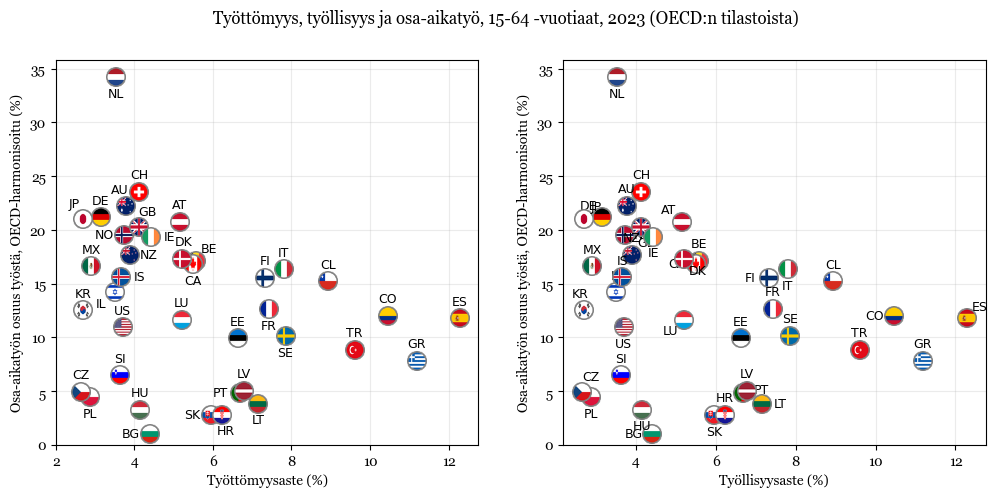

In [5]:
year = 2023
fig, axs = plot_two(year)
fig.savefig(f"osa-aikatyö.{year}.png", dpi=300)
plt.show()